In [166]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
import json
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

In [167]:
data = pd.read_csv("bob_ross_paintings.csv")

In [168]:
data.to_json("img_data.json", orient="records")

# How  many colors did he use?

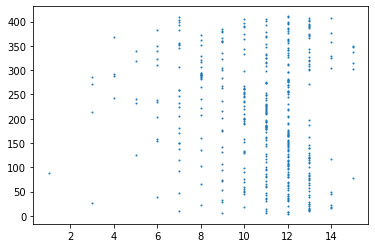

In [170]:
xpoints = data.num_colors
ypoints = data.painting_index

plt.plot(xpoints, ypoints, 'o', ms=1)
plt.show()

In [171]:
least_colorful = data[data['num_colors'] == 1]
least_colorful

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
200,201,89,https://www.twoinchbrush.com/images/painting89.png,Contemplative Lady,16,6,1,https://www.youtube.com/embed/gnp6WE7Ql-s,['Van Dyke Brown'],['#221B15'],...,0,0,0,0,0,0,0,1,0,0


In [172]:
most_colorful = data[data['num_colors'] == 15]
most_colorful

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
214,215,77,https://www.twoinchbrush.com/images/painting77.png,Spectacular Waterfall,17,7,15,https://www.youtube.com/embed/nK-HebXL2uw,"['Alizarin Crimson', 'Black Gesso', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#000000', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1
293,294,302,https://www.twoinchbrush.com/images/painting302.png,Valley Waterfall,23,8,15,https://www.youtube.com/embed/VYcsYzzRae4,"['Alizarin Crimson', 'Black Gesso', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#000000', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1
306,307,315,https://www.twoinchbrush.com/images/painting315.png,Graceful Waterfall,24,8,15,https://www.youtube.com/embed/fBh1nA4pMDY,"['Alizarin Crimson', 'Black Gesso', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#000000', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1
328,329,337,https://www.twoinchbrush.com/images/painting337.png,Lake in the Valley,26,4,15,https://www.youtube.com/embed/KvJmSrErm20,"['Alizarin Crimson', 'Black Gesso', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#000000', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1
339,340,348,https://www.twoinchbrush.com/images/painting348.png,Angler's Haven,27,2,15,https://www.youtube.com/embed/XlwfcXZ0AIU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Black', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#000000', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1
341,342,350,https://www.twoinchbrush.com/images/painting350.png,Wilderness Falls,27,4,15,https://www.youtube.com/embed/gxd0MPX8c6I,"['Alizarin Crimson', 'Bright Red', 'Cadmium Yellow', 'Dark Sienna', 'Indian Yellow', 'Liquid Black', 'Liquid Clear', 'Midnight Black\r\n\r\n', 'Phthalo Blue', 'Phthalo Green\r\n', 'Prussian Blue', 'Sap Green', 'Titanium White', 'Van Dyke Brown', 'Yellow Ochre']","['#4E1500', '#DB0000', '#FFEC00', '#5F2E1F', '#FFB800', '#000000', '#FFFFFF', '#000000', '#0C0040', '#102E3C', '#021E44', '#0A3410', '#FFFFFF', '#221B15', '#C79B00']",...,1,1,1,1,1,1,1,1,1,1


In [173]:
len(most_colorful)

6

# Count the color occurences

1. Count the unique hex codes and count their occurences

In [174]:
data.color_hex = data.color_hex.apply(ast.literal_eval)

In [175]:
data.colors = data.colors.apply(ast.literal_eval)

In [176]:
#list of unique hex colors
hex_colors = np.concatenate(data.color_hex.values)
len(set(hex_colors))

15

In [177]:
hex_counter = Counter(hex_colors)
hex_counter

Counter({'#4E1500': 380,
         '#DB0000': 321,
         '#FFEC00': 346,
         '#102E3C': 116,
         '#021E44': 263,
         '#0A3410': 306,
         '#FFFFFF': 451,
         '#221B15': 371,
         '#000000': 432,
         '#8A3324': 55,
         '#FFB800': 292,
         '#0C0040': 323,
         '#C79B00': 327,
         '#5F2E1F': 290,
         '#CD5C5C': 1})

2. Count the unique color names and their occurences

In [178]:
colors = np.concatenate(data.colors.values)
len(set(colors))

18

In [179]:
name_counter = Counter(colors)
name_counter

Counter({'Alizarin Crimson': 380,
         'Bright Red': 321,
         'Cadmium Yellow': 346,
         'Phthalo Green\r\n': 116,
         'Prussian Blue': 263,
         'Sap Green': 306,
         'Titanium White': 400,
         'Van Dyke Brown': 371,
         'Black Gesso': 101,
         'Burnt Umber': 55,
         'Indian Yellow': 292,
         'Phthalo Blue': 323,
         'Yellow Ochre': 327,
         'Liquid Black': 14,
         'Midnight Black\r\n\r\n': 317,
         'Liquid Clear': 51,
         'Dark Sienna': 290,
         'Indian Red': 1})

3. Count the columns with color names and how often they contain "1"

In [180]:
color_df = data.drop(["Unnamed: 0", "painting_index", "img_src", "painting_title", "season", "episode", "num_colors", "youtube_src", "colors", "color_hex"],
                    axis=1)

In [181]:
color_count = color_df.sum().sort_values(ascending=False)
color_count.size
color_count

Titanium_White      400
Alizarin_Crimson    380
Van_Dyke_Brown      371
Cadmium_Yellow      346
Yellow_Ochre        327
Phthalo_Blue        323
Bright_Red          321
Midnight_Black      317
Sap_Green           306
Indian_Yellow       292
Dark_Sienna         290
Prussian_Blue       263
Phthalo_Green       116
Black_Gesso         101
Burnt_Umber         55 
Liquid_Clear        51 
Liquid_Black        14 
Indian_Red          1  
dtype: int64

***Alarm:*** There is a mismatch between the hex codes (15 unique values) and the color names (18 unique values).

Problematic colors:

- Liquid Black: 14x, but no hex code
- Liquid Clear: 51x, but no hex code
- Black Gesso: 101x, but no hex code

Solution: They have the same hex codes (absolute black and white)

- 451x "#FFFFFF" = 400x Titanium white and 51x Liquid Clear
- 432x "#000000" = 101x Black Gesso, 14x Liquid Black, 317x Midnight Black

Decision: Merge them for the dataviz and explain the case separately

In [182]:
matched_colors = []

for color_name, color_count in name_counter.items():
    if color_name == "Liquid Black" or color_name == "Black Gesso" or color_name == "Midnight Black\r\n\r\n":
        color_hex = ['#000000']
    elif color_name == "Liquid Clear" or color_name == "Titanium White":
        color_hex = ["#FFFFFF"]
    else:
        color_hex = [hex_code for hex_code, hex_count in hex_counter.items() if hex_count == color_count]
        
    if color_name == "Midnight Black\r\n\r\n":
        color_name = "Midnight Black"
    elif color_name == "Phthalo Green\r\n":
        color_name = "Phthalo Green"
    
    if color_hex:
        matched_colors.append({
            "color_name": color_name,
            "color_hex": color_hex[0],
            "color_count": color_count
        })


In [183]:
matched_colors

[{'color_name': 'Alizarin Crimson',
  'color_hex': '#4E1500',
  'color_count': 380},
 {'color_name': 'Bright Red', 'color_hex': '#DB0000', 'color_count': 321},
 {'color_name': 'Cadmium Yellow', 'color_hex': '#FFEC00', 'color_count': 346},
 {'color_name': 'Phthalo Green', 'color_hex': '#102E3C', 'color_count': 116},
 {'color_name': 'Prussian Blue', 'color_hex': '#021E44', 'color_count': 263},
 {'color_name': 'Sap Green', 'color_hex': '#0A3410', 'color_count': 306},
 {'color_name': 'Titanium White', 'color_hex': '#FFFFFF', 'color_count': 400},
 {'color_name': 'Van Dyke Brown', 'color_hex': '#221B15', 'color_count': 371},
 {'color_name': 'Black Gesso', 'color_hex': '#000000', 'color_count': 101},
 {'color_name': 'Burnt Umber', 'color_hex': '#8A3324', 'color_count': 55},
 {'color_name': 'Indian Yellow', 'color_hex': '#FFB800', 'color_count': 292},
 {'color_name': 'Phthalo Blue', 'color_hex': '#0C0040', 'color_count': 323},
 {'color_name': 'Yellow Ochre', 'color_hex': '#C79B00', 'color_coun

In [184]:
color_groups = {"blue": ["#0C0040", "#021E44"],
                "green": ["#102E3C", "#0A3410"],
                "yellow": ["#C79B00", "#FFEC00", "#FFB800"],
                "red": ["#DB0000", "#CD5C5C"],
                "brown": ["#8A3324", "#5F2E1F", "#4E1500", "#221B15"],
                "black" : ["#000000"],
                "white": ["#FFFFFF"]}

In [185]:
for col in matched_colors:
    for group, codes in color_groups.items():
        if col["color_hex"] in codes:
            col.update({"group_name":  group})

In [194]:
matched_colors

[{'color_name': 'Alizarin Crimson',
  'color_hex': '#4E1500',
  'color_count': 380,
  'group_name': 'brown'},
 {'color_name': 'Bright Red',
  'color_hex': '#DB0000',
  'color_count': 321,
  'group_name': 'red'},
 {'color_name': 'Cadmium Yellow',
  'color_hex': '#FFEC00',
  'color_count': 346,
  'group_name': 'yellow'},
 {'color_name': 'Phthalo Green',
  'color_hex': '#102E3C',
  'color_count': 116,
  'group_name': 'green'},
 {'color_name': 'Prussian Blue',
  'color_hex': '#021E44',
  'color_count': 263,
  'group_name': 'blue'},
 {'color_name': 'Sap Green',
  'color_hex': '#0A3410',
  'color_count': 306,
  'group_name': 'green'},
 {'color_name': 'Titanium White',
  'color_hex': '#FFFFFF',
  'color_count': 400,
  'group_name': 'white'},
 {'color_name': 'Van Dyke Brown',
  'color_hex': '#221B15',
  'color_count': 371,
  'group_name': 'brown'},
 {'color_name': 'Black Gesso',
  'color_hex': '#000000',
  'color_count': 101,
  'group_name': 'black'},
 {'color_name': 'Burnt Umber',
  'color_he

In [187]:
with open("color_counts.json", "w") as outfile:
    outfile.write(json.dumps(matched_colors))

# How did his choice of colors change over time?

In [209]:
season_colors = data.drop(["Unnamed: 0",
                         "painting_index",
                         "img_src",
                         "painting_title",
                         "episode",
                         "num_colors",
                        "youtube_src",
                        "colors",
                        "color_hex"], axis=1).groupby('season').sum()

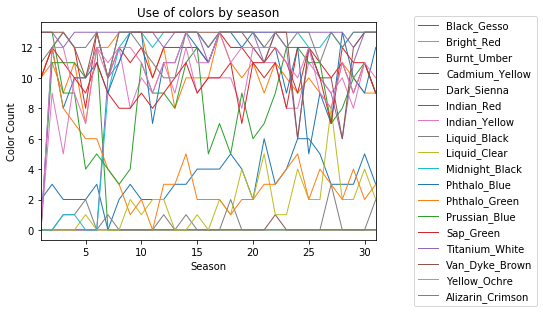

In [189]:
season_colors.plot(kind='line', linewidth=1)
plt.title('Use of colors by season')
plt.xlabel('Season')
plt.ylabel('Color Count')
plt.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()

In [210]:
#remove _ in column names
season_colors.columns = season_colors.columns.str.replace("_", " ")
#rename columns: hex_code instead of color name
season_colors.columns = [[col for col in matched_colors if col["color_name"] == season][0]["color_hex"] for season in season_colors.columns.str.replace("_", " ")]

In [211]:
#sum the occurences of the different black and white types
season_colors = season_colors.groupby(season_colors.columns, axis=1).sum()

## Grouping colors

In [212]:
def groupname(colorcode):
    for color in matched_colors:
        if str(color["color_hex"]) == str(colorcode):
            return color["group_name"]

In [213]:
season_colors_grouped = season_colors
season_colors_grouped.columns = [groupname(col) for col in season_colors.columns]
season_colors_grouped = season_colors_grouped.groupby(season_colors.columns, axis=1).sum()

In [215]:
season_colors_grouped

,black,blue,brown,green,red,white,yellow
season,,,,,,,
1,2,13,24,20,10,13,10
2,3,25,36,24,11,13,33
3,4,17,37,19,9,12,30
4,4,19,35,17,11,13,31
5,4,14,32,15,7,14,25
6,3,16,38,17,12,13,37
7,10,13,30,13,12,13,31
8,14,14,37,11,13,13,36
9,16,17,39,9,13,15,31


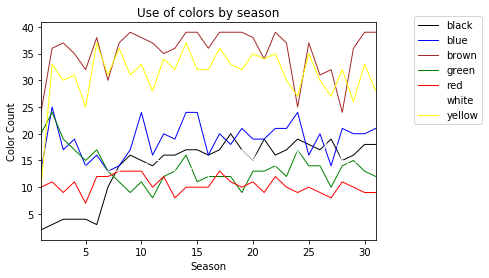

In [225]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Iterate over each column and plot the line with specified color
for column in season_colors_grouped.columns:
    season_colors_grouped[column].plot(kind='line', linewidth=1, ax=ax, label=column, color=column)

plt.title('Use of colors by season')
plt.xlabel('Season')
plt.ylabel('Color Count')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

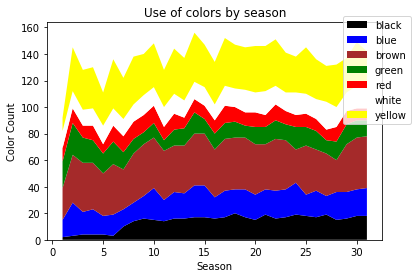

In [227]:
# Create a custom colormap based on the column names
colors = season_colors_grouped.columns

# Create a list to store the y-values for each area
y_values = []

# Iterate over each column and append the values to the y_values list
for column in season_colors_grouped.columns:
    y_values.append(season_colors_grouped[column])

# Plot the stacked areas
plt.stackplot(season_colors_grouped.index, y_values, labels=season_colors_grouped.columns, colors=colors)

plt.title('Use of colors by season')
plt.xlabel('Season')
plt.ylabel('Color Count')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [ ]:
season_colors = season_colors.transpose()
season_colors.to_json("season_colors.json")

In [217]:
season_colors_grouped = season_colors_grouped.transpose()
season_colors_grouped.to_json("season_colors_grouped.json")